# Import Required Libraries
Import necessary libraries including sklearn, numpy, matplotlib, and pandas for data manipulation and visualization.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Load MNIST Dataset
Load the MNIST dataset from sklearn.datasets and examine its basic properties.

In [2]:
# Load MNIST dataset
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist.data, mnist.target.astype(int)

print(f"Dataset shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"Unique classes: {np.unique(y)}")

Dataset shape: (70000, 784)
Target shape: (70000,)
Unique classes: [0 1 2 3 4 5 6 7 8 9]


# Part A: Image Classification with CNN

## 1. Data Preparation
Load dataset, preprocess images, and visualize sample data.

In [3]:
# Additional imports for deep learning
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.applications import MobileNetV2, ResNet50
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from transformers import pipeline, AutoTokenizer, AutoModelForSequenceClassification

C:\Users\uday2\AppData\Roaming\Python\Python312\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
# Preprocess images for CNN
X_reshaped = X.reshape(-1, 28, 28, 1)
X_normalized = X_reshaped / 255.0

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X_normalized, y, test_size=0.2, random_state=42
)

print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Test labels shape: {y_test.shape}")

Training data shape: (56000, 28, 28, 1)
Test data shape: (14000, 28, 28, 1)
Training labels shape: (56000,)
Test labels shape: (14000,)


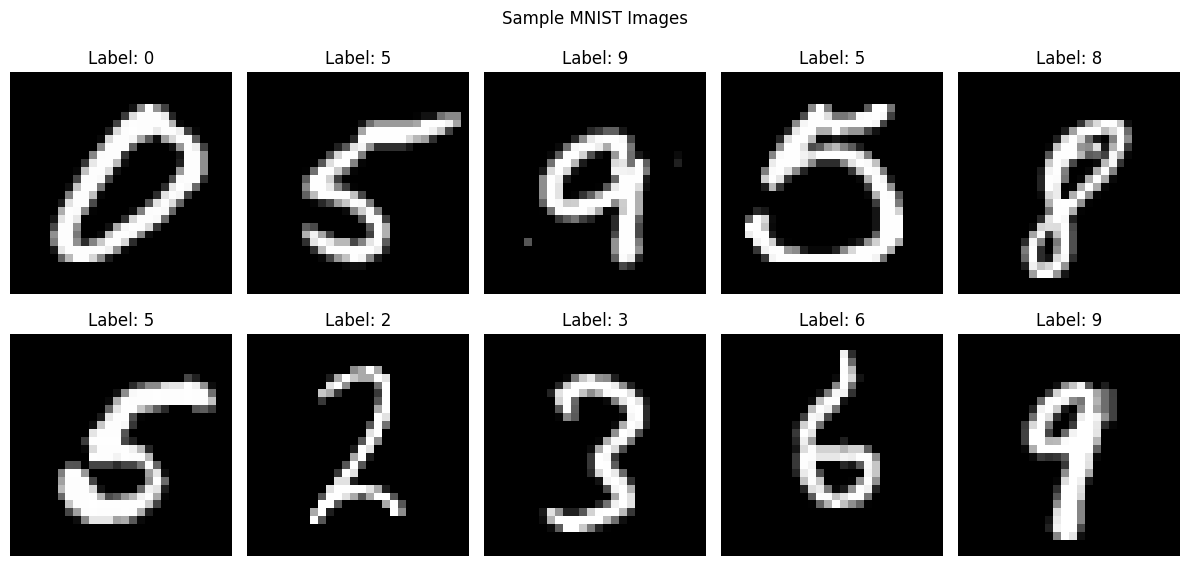

In [5]:
# Visualize sample images and class distribution
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
fig.suptitle('Sample MNIST Images')

# Display sample images
sample_indices = np.random.choice(len(X_train), 10, replace=False)
axes_flat = axes.flatten()

# Show images using direct indexing
sample_images = X_train[sample_indices]
sample_labels = y_train[sample_indices]

# Display each image and label
axes_flat[0].imshow(sample_images[0].reshape(28, 28), cmap='gray')
axes_flat[0].set_title(f'Label: {sample_labels[0]}')
axes_flat[0].axis('off')

axes_flat[1].imshow(sample_images[1].reshape(28, 28), cmap='gray')
axes_flat[1].set_title(f'Label: {sample_labels[1]}')
axes_flat[1].axis('off')

axes_flat[2].imshow(sample_images[2].reshape(28, 28), cmap='gray')
axes_flat[2].set_title(f'Label: {sample_labels[2]}')
axes_flat[2].axis('off')

axes_flat[3].imshow(sample_images[3].reshape(28, 28), cmap='gray')
axes_flat[3].set_title(f'Label: {sample_labels[3]}')
axes_flat[3].axis('off')

axes_flat[4].imshow(sample_images[4].reshape(28, 28), cmap='gray')
axes_flat[4].set_title(f'Label: {sample_labels[4]}')
axes_flat[4].axis('off')

axes_flat[5].imshow(sample_images[5].reshape(28, 28), cmap='gray')
axes_flat[5].set_title(f'Label: {sample_labels[5]}')
axes_flat[5].axis('off')

axes_flat[6].imshow(sample_images[6].reshape(28, 28), cmap='gray')
axes_flat[6].set_title(f'Label: {sample_labels[6]}')
axes_flat[6].axis('off')

axes_flat[7].imshow(sample_images[7].reshape(28, 28), cmap='gray')
axes_flat[7].set_title(f'Label: {sample_labels[7]}')
axes_flat[7].axis('off')

axes_flat[8].imshow(sample_images[8].reshape(28, 28), cmap='gray')
axes_flat[8].set_title(f'Label: {sample_labels[8]}')
axes_flat[8].axis('off')

axes_flat[9].imshow(sample_images[9].reshape(28, 28), cmap='gray')
axes_flat[9].set_title(f'Label: {sample_labels[9]}')
axes_flat[9].axis('off')

plt.tight_layout()
plt.show()

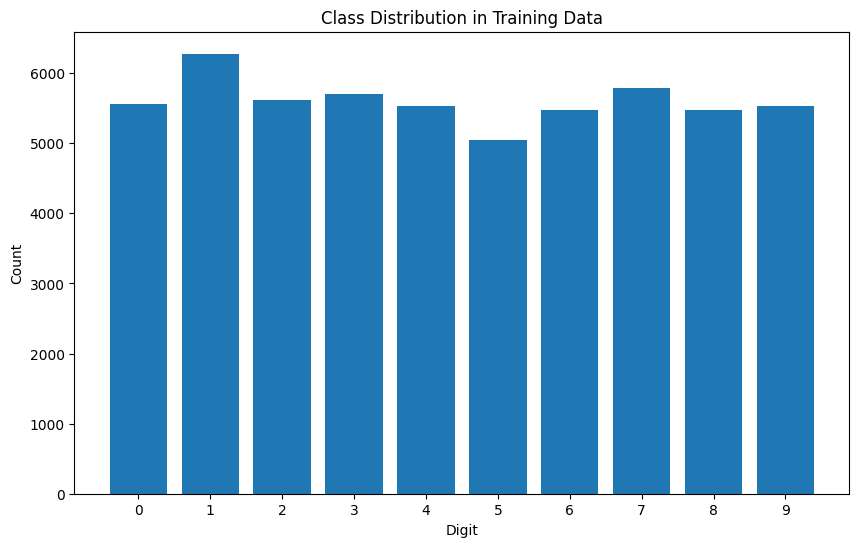

In [6]:
# Class distribution
unique_labels, counts = np.unique(y_train, return_counts=True)
plt.figure(figsize=(10, 6))
plt.bar(unique_labels, counts)
plt.title('Class Distribution in Training Data')
plt.xlabel('Digit')
plt.ylabel('Count')
plt.xticks(unique_labels)
plt.show()

## 2. Model Building
Build a CNN using Keras Sequential API with convolutional, pooling, and dense layers.

In [7]:
# Build CNN model
cnn_model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Display model architecture
cnn_model.summary()

C:\Users\uday2\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

## 3. Training and Evaluation
Compile, train the model, and evaluate performance.

In [8]:
# Compile and train the model
cnn_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model
history = cnn_model.fit(
    X_train, y_train,
    epochs=5,
    batch_size=128,
    validation_split=0.2,
    verbose=1
)

Epoch 1/5
350/350 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.8088 - loss: 0.6474 - val_accuracy: 0.9752 - val_loss: 0.0776
Epoch 2/5
350/350 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.9785 - loss: 0.0687 - val_accuracy: 0.9811 - val_loss: 0.0605
Epoch 3/5
350/350 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.9854 - loss: 0.0475 - val_accuracy: 0.9865 - val_loss: 0.0427
Epoch 4/5
350/350 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - accuracy: 0.9890 - loss: 0.0346 - val_accuracy: 0.9880 - val_loss: 0.0371
Epoch 5/5
350/350 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step - accuracy: 0.9904 - loss: 0.0284 - val_accuracy: 0.9879 - val_loss: 0.0393


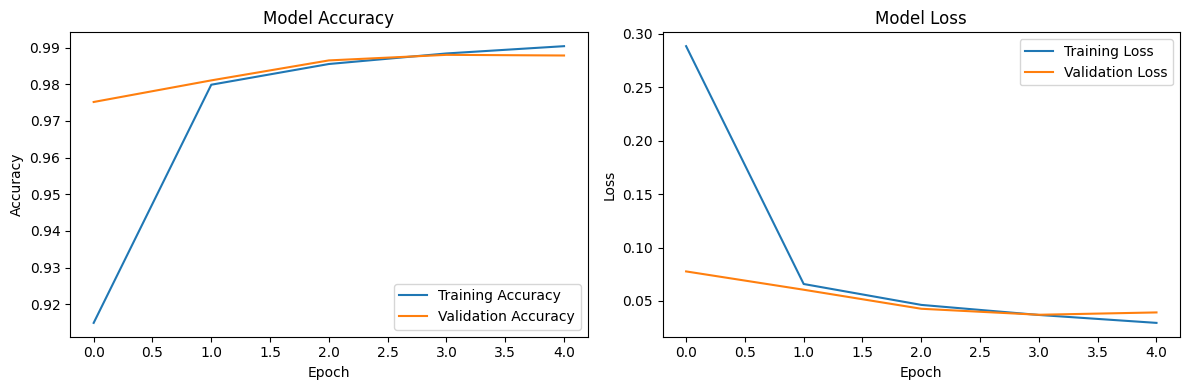

In [9]:
# Plot training history
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Plot accuracy
ax1.plot(history.history['accuracy'], label='Training Accuracy')
ax1.plot(history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_title('Model Accuracy')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.legend()

# Plot loss
ax2.plot(history.history['loss'], label='Training Loss')
ax2.plot(history.history['val_loss'], label='Validation Loss')
ax2.set_title('Model Loss')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.legend()

plt.tight_layout()
plt.show()

In [10]:
# Evaluate model on test data
test_loss, test_accuracy = cnn_model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")

# Make predictions
y_pred = cnn_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_classes))

Test Accuracy: 0.9848
Test Loss: 0.0438
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98      1343
           1       0.99      1.00      0.99      1600
           2       0.98      0.99      0.98      1380
           3       0.99      0.99      0.99      1433
           4       0.99      0.99      0.99      1295
           5       1.00      0.98      0.99      1273
           6       0.96      1.00      0.98      1396
           7       0.99      0.99      0.99      1503
           8       0.98      0.98      0.98      1357
           9       0.99      0.98      0.99      1420

    accuracy                           0.98     14000
   macro avg       0.99      0.98      0.98     14000
weighted avg       0.98      0.98      0.98     14000



## 4. Transfer Learning
Load pre-trained model, freeze base layers, and add custom classifier.

In [12]:
# Prepare data for transfer learning (use smaller subset to avoid memory issues)
# Use only 1000 samples for transfer learning demo
subset_size = 1000
X_train_subset = X_train[:subset_size]
y_train_subset = y_train[:subset_size]
X_test_subset = X_test[:500]
y_test_subset = y_test[:500]

# Resize to 224x224 for pre-trained models and convert to RGB
X_train_rgb = np.repeat(tf.image.resize(X_train_subset, [224, 224]), 3, axis=-1)
X_test_rgb = np.repeat(tf.image.resize(X_test_subset, [224, 224]), 3, axis=-1)

# Load pre-trained MobileNetV2
base_model = MobileNetV2(
    weights='imagenet',
    include_top=False,
    input_shape=(224, 224, 3)
)

# Freeze base model layers
base_model.trainable = False

# Add custom classifier head
transfer_model = keras.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

transfer_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,423,242 (9.24 MB)

 Trainable params: 165,258 (645.54 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [13]:
# Compile and train transfer learning model
transfer_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Train transfer learning model on subset
transfer_history = transfer_model.fit(
    X_train_rgb, y_train_subset,
    epochs=3,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

# Evaluate transfer learning model
transfer_test_loss, transfer_test_accuracy = transfer_model.evaluate(X_test_rgb, y_test_subset, verbose=0)
print(f"Transfer Learning Test Accuracy: {transfer_test_accuracy:.4f}")
print(f"Custom CNN Test Accuracy: {test_accuracy:.4f}")
print(f"Improvement: {transfer_test_accuracy - test_accuracy:.4f}")

Epoch 1/3
25/25 ━━━━━━━━━━━━━━━━━━━━ 31s 731ms/step - accuracy: 0.4041 - loss: 1.7698 - val_accuracy: 0.8050 - val_loss: 0.6317
Epoch 2/3
25/25 ━━━━━━━━━━━━━━━━━━━━ 16s 638ms/step - accuracy: 0.8792 - loss: 0.4097 - val_accuracy: 0.8850 - val_loss: 0.4333
Epoch 3/3
25/25 ━━━━━━━━━━━━━━━━━━━━ 16s 622ms/step - accuracy: 0.9682 - loss: 0.1811 - val_accuracy: 0.9200 - val_loss: 0.2977
Transfer Learning Test Accuracy: 0.8900
Custom CNN Test Accuracy: 0.9848
Improvement: -0.0948


# Part B: Text Classification with RNN

## 1. Text Preprocessing
Prepare text data for RNN training.

In [14]:
# Create sample text data for classification
texts = [
    "This is a positive review", "Great product, highly recommended",
    "Terrible quality, waste of money", "Not satisfied with purchase",
    "Amazing service and fast delivery", "Poor customer support experience",
    "Excellent quality for the price", "Would not recommend to others",
    "Outstanding performance and features", "Disappointed with the results"
]

labels = [1, 1, 0, 0, 1, 0, 1, 0, 1, 0]  # 1: positive, 0: negative

# Tokenize and pad sequences
tokenizer = Tokenizer(num_words=1000, oov_token="<OOV>")
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
padded_sequences = pad_sequences(sequences, maxlen=10, padding='post')

print(f"Tokenized sequences shape: {padded_sequences.shape}")
print(f"Labels shape: {np.array(labels).shape}")
print(f"Vocabulary size: {len(tokenizer.word_index)}")

Tokenized sequences shape: (10, 10)
Labels shape: (10,)
Vocabulary size: 41


In [15]:
# Split text data
X_text_train, X_text_test, y_text_train, y_text_test = train_test_split(
    padded_sequences, labels, test_size=0.3, random_state=42
)

print(f"Text training data shape: {X_text_train.shape}")
print(f"Text test data shape: {X_text_test.shape}")
print(f"Text training labels shape: {np.array(y_text_train).shape}")
print(f"Text test labels shape: {np.array(y_text_test).shape}")

Text training data shape: (7, 10)
Text test data shape: (3, 10)
Text training labels shape: (7,)
Text test labels shape: (3,)


## 2. Model Building
Build RNN model with embedding and LSTM layers.

In [16]:
# Build RNN model for text classification
rnn_model = keras.Sequential([
    layers.Embedding(input_dim=1000, output_dim=64, input_length=10),
    layers.LSTM(64, return_sequences=True),
    layers.LSTM(32),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Display RNN model architecture
rnn_model.summary()

C:\Users\uday2\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

## 3. Training and Evaluation
Train RNN model and evaluate performance.

In [17]:
# Compile and train RNN model
rnn_model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Train RNN model
rnn_history = rnn_model.fit(
    X_text_train, np.array(y_text_train),
    epochs=10,
    batch_size=2,
    validation_split=0.2,
    verbose=1
)

Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 225ms/step - accuracy: 0.0000e+00 - loss: 0.6955 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.5500 - loss: 0.6922 - val_accuracy: 0.5000 - val_loss: 0.6930
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.6125 - loss: 0.6892 - val_accuracy: 0.5000 - val_loss: 0.6933
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.6750 - loss: 0.6856 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.6750 - loss: 0.6816 - val_accuracy: 0.5000 - val_loss: 0.6933
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.4250 - loss: 0.6873 - val_accuracy: 0.5000 - val_loss: 0.6935
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.7375 - loss: 0.6679 - val_accuracy: 0.5000 - val_loss: 0.6938
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.4250 - loss: 0.6778 - val_accuracy: 0.5000 - val_loss: 0.

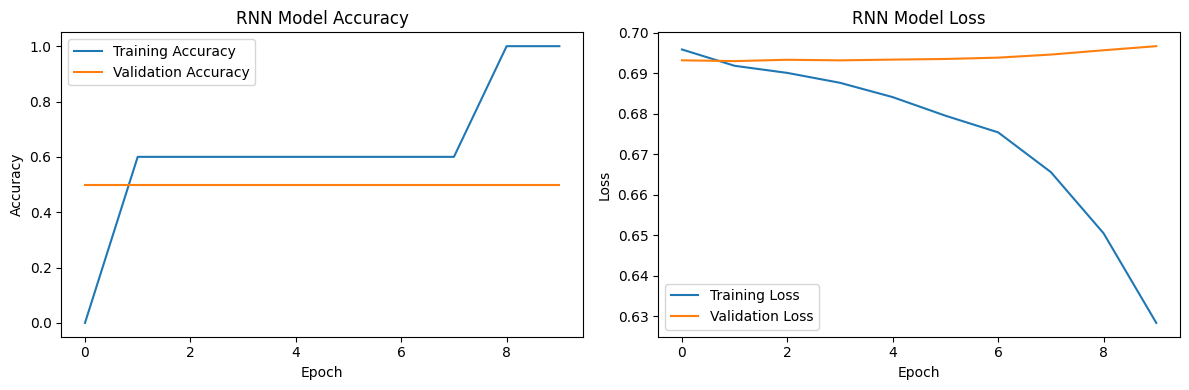

RNN Test Accuracy: 0.3333
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step
Sample predictions: [0 0 0]
Actual labels: [1, 1, 0]


In [18]:
# Plot RNN training history
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Plot RNN accuracy
ax1.plot(rnn_history.history['accuracy'], label='Training Accuracy')
ax1.plot(rnn_history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_title('RNN Model Accuracy')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.legend()

# Plot RNN loss
ax2.plot(rnn_history.history['loss'], label='Training Loss')
ax2.plot(rnn_history.history['val_loss'], label='Validation Loss')
ax2.set_title('RNN Model Loss')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.legend()

plt.tight_layout()
plt.show()

# Evaluate RNN model
rnn_test_loss, rnn_test_accuracy = rnn_model.evaluate(X_text_test, np.array(y_text_test), verbose=0)
print(f"RNN Test Accuracy: {rnn_test_accuracy:.4f}")

# Make predictions
rnn_predictions = rnn_model.predict(X_text_test)
rnn_pred_classes = (rnn_predictions > 0.5).astype(int)
print(f"Sample predictions: {rnn_pred_classes.flatten()}")
print(f"Actual labels: {y_text_test}")

## 4. Embeddings with Hugging Face
Use pre-trained transformer models for text classification.

In [19]:
# Load pre-trained transformer model using pipeline
sentiment_pipeline = pipeline("sentiment-analysis", model="distilbert-base-uncased-finetuned-sst-2-english")

# Test sample texts
test_texts = [
    "This is a great product, I love it!",
    "Terrible quality, very disappointed.",
    "Average performance, nothing special."
]

# Get transformer predictions
transformer_results = sentiment_pipeline(test_texts)
print("Transformer Model Results:")
transformer_results_display = [
    f"Text: '{text}' -> Label: {result['label']}, Score: {result['score']:.4f}"
    for text, result in zip(test_texts, transformer_results)
]
print('\n'.join(transformer_results_display))

# Compare with RNN predictions on same texts
test_sequences = tokenizer.texts_to_sequences(test_texts)
test_padded = pad_sequences(test_sequences, maxlen=10, padding='post')
rnn_test_predictions = rnn_model.predict(test_padded)

print(f"\nRNN Model Predictions (probability of positive): {rnn_test_predictions.flatten()}")
print("Comparison: Transformer models generally show better performance due to pre-training on large datasets.")

C:\Users\uday2\AppData\Roaming\Python\Python312\site-packages\huggingface_hub\file_download.py:140: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\uday2\.cache\huggingface\hub\models--distilbert-base-uncased-finetuned-sst-2-english. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
Device set to use cpu


Transformer Model Results:
Text: 'This is a great product, I love it!' -> Label: POSITIVE, Score: 0.9999
Text: 'Terrible quality, very disappointed.' -> Label: NEGATIVE, Score: 0.9998
Text: 'Average performance, nothing special.' -> Label: NEGATIVE, Score: 0.9993
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step

RNN Model Predictions (probability of positive): [0.51144814 0.44050995 0.45830536]
Comparison: Transformer models generally show better performance due to pre-training on large datasets.
